In [1]:
from flask import Flask, request, render_template, jsonify
from flask_bootstrap import Bootstrap
from keras.models import load_model
import boto3

from forms import JohannForm
from generate import generate_sequence, play_melody
from utils import unpack_corpus, create_png_from_stream, create_midi_from_stream, upload_to_s3_bucket

Using TensorFlow backend.


In [2]:
model_data = {
    'corpus': unpack_corpus('corpus/bach_suites_corpus.pkl'),
    'models': {}
}

In [3]:
phrase_lengths = [10, 20, 35, 50]
layer_size = 512
step_size = 3

In [4]:
for phrase_len in phrase_lengths:
    model_data['models']['len_{}'.format(phrase_len)] = load_model('model_save/bach_model_{}_{}_{}.h5'.format(step_size, phrase_len, layer_size))

In [5]:
melody_corpus, melody_set, notes_indices, indices_notes = model_data['corpus']

In [6]:
temperature = 1.7

In [7]:
phrase_len = 10

In [8]:
seq_len = 80

In [9]:
model = model_data['models']['len_{}'.format(phrase_len)]

In [10]:
model

In [11]:
songname = "meu_som.midi"

In [12]:
melody = generate_sequence(model, seq_len, melody_corpus, melody_set, phrase_len, notes_indices, indices_notes, temperature)

In [13]:
melody

[(41, 0.0, 0.25),
 (45, 0.0, 0.25),
 (43, 0.0, 0.25),
 (45, 1.0, 0.25),
 (41, 0.0, 0.25),
 (45, 0.0, 0.25),
 (41, 0.0, 0.25),
 (36, 4.0, 0.25),
 (47, 0.0, 0.25),
 (53, 0.0, 0.25),
 (48, 0.0, 0.25),
 (40, 0.0, 0.25),
 (48, 0.0, 0.25),
 (41, 4.0, 0.25),
 (43, 0.0, 0.25),
 (50, 0.0, 0.25),
 (46, 1.0, 0.25),
 (48, 0.0, 0.25),
 (48, 0.0, 0.25),
 (53, 0.0, 0.25),
 (43, 0.0, 0.25),
 (55, 0.0, 0.25),
 (43, 0.0, 0.25),
 (50, 0.0, 0.25),
 (50, 0.0, 0.25),
 (43, 0.0, 0.25),
 (43, 0.0, 0.25),
 (43, 0.0, 0.25),
 (52, 0.0, 0.25),
 (50, 0.0, 0.25),
 (47, 0.0, 0.25),
 (43, 0.0, 0.25),
 (43, 0.0, 0.25),
 (47, 2.0, 0.25),
 (43, 0.0, 0.25),
 (50, 0.0, 0.25),
 (43, 0.0, 0.25),
 (47, 0.0, 0.25),
 (52, 0.0, 0.25),
 (43, 0.0, 0.25),
 (43, 0.0, 0.25),
 (43, 0.0, 0.25),
 (48, 0.0, 0.25),
 (43, 0.0, 0.25),
 (43, 0.0, 0.25),
 (50, 0.0, 0.25),
 (43, 0.0, 0.25),
 (43, 0.0, 0.25),
 (50, 0.0, 0.25),
 (43, 0.0, 0.25),
 (29, 2.0, 0.25),
 (48, 0.0, 0.25),
 (53, 0.0, 0.25),
 (0, 0.0, 3.75),
 (43, 0.0, 0.25),
 (44, 2.0, 

In [14]:
stream = play_melody(melody)

In [15]:
stream

<music21.stream.Stream 0x7fe0a17aae80>

In [16]:
create_midi_from_stream(stream, songname)

In [17]:
songname

'meu_som.midi'

In [18]:
#png_path = create_png_from_stream(stream, songname)
from IPython.display import *

In [19]:
#stream.show()

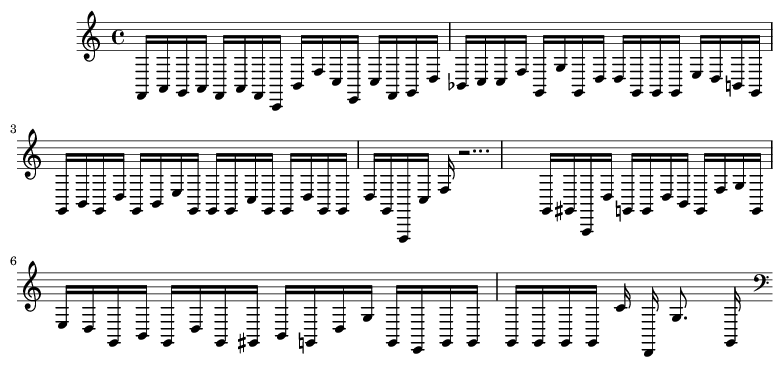

In [21]:
Image(filename=stream.write('lily.png'))

In [22]:
stream.show('text')

{0.0} <music21.stream.Part 0x7fe09daffc50>
    {0.0} <music21.instrument.Harpsichord Harpsichord>
    {0.0} <music21.clef.BassClef>
    {0.0} <music21.stream.Voice 0x7fe09dac5f60>
        {0.0} <music21.note.Note F>
        {0.25} <music21.note.Note A>
        {0.5} <music21.note.Note G>
        {0.75} <music21.note.Note A>
        {1.0} <music21.note.Note F>
        {1.25} <music21.note.Note A>
        {1.5} <music21.note.Note F>
        {1.75} <music21.note.Note C>
        {2.0} <music21.note.Note B>
        {2.25} <music21.note.Note F>
        {2.5} <music21.note.Note C>
        {2.75} <music21.note.Note E>
        {3.0} <music21.note.Note C>
        {3.25} <music21.note.Note F>
        {3.5} <music21.note.Note G>
        {3.75} <music21.note.Note D>
        {4.0} <music21.note.Note B->
        {4.25} <music21.note.Note C>
        {4.5} <music21.note.Note C>
        {4.75} <music21.note.Note F>
        {5.0} <music21.note.Note G>
        {5.25} <music21.note.Note G>
        {5.5} <m